Plots to compare different methods for detecting peaks

In [101]:
import sys
sys.path.append("../../")

In [148]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict, colors_dj_35
import matplotlib.pyplot as plt
import numpy as np

In [103]:
# We choose a waveform that has eccentricity

In [104]:
filepath = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0021411509_Momega00.010.h5"
filepath_zeroecc = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002.h5"

In [105]:
waveform_kwargs = {"filepath": filepath,
                   "filepath_zero_ecc": filepath_zeroecc,
                   "include_zero_ecc": True}

In [106]:
dataDict = load_waveform("EOB", **waveform_kwargs)

In [107]:
tref_in = dataDict["t"]

In [108]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:421: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinitionUsingAmplitude.py:79: PeakPropertyWarning: some peaks have a width of 0
  return find_peaks(
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:421: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/tmp/ipykernel_944036/626026647.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axins_amp.set_yticklabels(yticklabels, fontsize=7)
/tmp/ipykernel_944036/626026647.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axins_freq.set_yticklabels(yticklabels, fontsize=7)


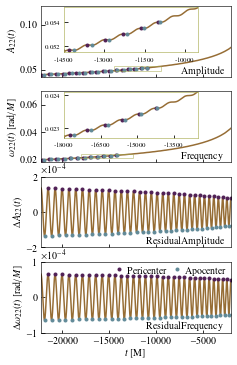

In [153]:
fig, ax = plt.subplots(nrows=4, figsize=(figWidthsOneColDict[journal], 6), sharex=True)
axins_amp = ax[0].inset_axes([0.12, 0.35, 0.71, 0.64])
axins_freq = ax[1].inset_axes([0.12, 0.35, 0.71, 0.64])
inset_ax = [axins_amp, axins_freq]
for idx, method in enumerate(["Amplitude", "Frequency", "ResidualAmplitude", "ResidualFrequency"]):
    tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True)
    if method == "Frequency":
        data = eccMethod.omega22
        ylabel = r"$\omega_{22}(t)$ [rad/$M$]"
    elif method == "Amplitude":
        data = eccMethod.amp22
        ylabel = r"$A_{22}(t)$"
    elif method == "ResidualFrequency":
        data = eccMethod.res_omega22
        ylabel = r"$\Delta\omega_{22}(t)$ [rad/$M$]"
    elif method == "ResidualAmplitude":
        data = eccMethod.res_amp22
        ylabel = r"$\Delta A_{22}(t)$"
    else:
        raise Exception("Invalid Method")
    ax[idx].plot(eccMethod.t, data, c=colorsDict["default"])
    ax[idx].plot(eccMethod.t[eccMethod.peaks_location], data[eccMethod.peaks_location],
                 c=colorsDict["periastron"],
                 label="Pericenter", marker=".", ls="")
    ax[idx].plot(eccMethod.t[eccMethod.troughs_location], data[eccMethod.troughs_location],
                 c=colorsDict["apastron"],
                 label="Apocenter", marker=".", ls="")
    ax[idx].set_ylabel(ylabel)
    ax[idx].text(0.96, 0.03, method, ha="right", va="bottom", transform=ax[idx].transAxes,
                # bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.1')
                )
    if idx in [0, 1]:
        inset_ax[idx].plot(eccMethod.t, data, c=colorsDict["default"])
        inset_ax[idx].plot(eccMethod.t[eccMethod.peaks_location], data[eccMethod.peaks_location],
                 c=colorsDict["periastron"],
                 marker=".", ls="")
        inset_ax[idx].plot(eccMethod.t[eccMethod.troughs_location], data[eccMethod.troughs_location],
                 c=colorsDict["apastron"],
                 marker=".", ls="")
    ax[idx].set_xlim(left=eccMethod.t[0], right=-2000)
ax[3].legend(loc="upper right", handlelength=0.01, labelspacing=0.1, borderaxespad=0.01, columnspacing=1, frameon=False, ncol=2)
ax[1].set_ylim(0.018, 0.07)
ax[0].set_ylim(0.042, 0.12)
ax[3].set_ylim(-1e-4, 1e-4)
ax[2].set_ylim(-2e-4, 2e-4)
ax[3].set_xlabel(r"$t$ [M]")

# ax[0].set_yticks(np.arange(0.04, 0.12, 0.03))

ax[2].ticklabel_format(style='sci',scilimits=(-3,4), axis='y')
ax[3].ticklabel_format(style='sci',scilimits=(-3,4), axis='y')

axins_amp.set_ylim(0.0493, 0.054)
axins_amp.set_xlim(left=-14500, right=-9500)
xticks = np.arange(-14500, -9000, 1500)
axins_amp.set_xticks(xticks)
xticklabels = [f"{x}" for x in xticks]
axins_amp.set_xticklabels(xticklabels, fontsize=7)
yticks = np.arange(0.05, 0.055, 0.002)
yticklabels = [f"{x:.3f}" for x in yticks]
axins_amp.set_yticklabels(yticklabels, fontsize=7)

axins_freq.set_ylim(0.0214, 0.02415)
axins_freq.set_xlim(left=-18000, right=-12500)
xticks = np.arange(-18000, -12000, 1500)
axins_freq.set_xticks(xticks)
xticklabels = [f"{x}" for x in xticks]
axins_freq.set_xticklabels(xticklabels, fontsize=7)
yticks = np.arange(0.022, 0.025, 0.001)
yticklabels = [f"{x:.3f}" for x in yticks]
axins_freq.set_yticklabels(yticklabels, fontsize=7)


_, connectLinesAmp = ax[0].indicate_inset_zoom(axins_amp, edgecolor=colors_dj_35[0])
# connectLinesAmp[0].set_linestyle(":")
# connectLinesAmp[2].set_linestyle(":")
connectLinesAmp[0].set(visible=False)
connectLinesAmp[2].set(visible=False)

_, connectLinesFreq = ax[1].indicate_inset_zoom(axins_freq, edgecolor=colors_dj_35[0])
# connectLinesFreq[0].set_linestyle(":")
# connectLinesFreq[2].set_linestyle(":")
connectLinesFreq[0].set(visible=False)
connectLinesFreq[2].set(visible=False)

for pos in ['top', 'bottom', 'right', 'left']:
        axins_amp.spines[pos].set_edgecolor(colors_dj_35[0])
        axins_freq.spines[pos].set_edgecolor(colors_dj_35[0])

In [154]:
fig.subplots_adjust(left=0.15, bottom=0.07, right=0.98, top=0.99, hspace=0.15)
fig.savefig("../figs/compare_methods.pdf")